## Importing Libraries

In [2]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display

%matplotlib inline

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import cv2

## Importing the Data

In [11]:
#import data
df = pd.read_csv("augmented_data.csv")
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14866 entries, 0 to 14865
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14866 non-null  int64  
 1   index       14866 non-null  int64  
 2   image_path  14866 non-null  object 
 3   steering    14866 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 464.7+ KB


In [12]:
length = df["index"][-1::]
split = int(length/100*80) #80% for training 20% for testing
print(split)


11892


In [13]:
#shuffling the set before we split it
df_shuffled = df.sample(frac=1)

In [14]:
#print header to see if it shuffled
df_shuffled.head()

,Unnamed: 0,index,image_path,steering
14862,14862,14862,learning_images//14862.jpeg,-0.079812
13416,13416,13416,learning_images//13416.jpeg,-0.084507
13515,13515,13515,learning_images//13515.jpeg,-0.070423
14343,14343,14343,learning_images//14343.jpeg,-0.070423
13894,13894,13894,learning_images//13894.jpeg,-0.065728


In [35]:
#placeholders, ram intensive - might crash on lower end machines
x_train = np.full((split,160,320,3),0)
x_test = np.full((int(length-split+1),160,320,3),0)

In [38]:
#split in training and testing data
#x holds the image
#y holds the steering input
train = df_shuffled.iloc[:split,:]
test = df_shuffled.iloc[split:,:]

#training data
x_train_path = train["image_path"]
y_train = train["steering"]

#testing data
x_test_path = test["image_path"]
y_test = test["steering"]

#import all images from paths, might be ram intensive 16gb or more might be required
index = 0
for path in x_train_path:
    x_train[index] = cv2.imread(path)
    index = index + 1

    
#for test set as well
index = 0
for path in x_test_path:
    x_test[index] = cv2.imread(path)
    index = index + 1



In [39]:
#checking outputs
print(x_train[0])
print(y_train[0])

[[[188 137 105]
  [186 137 105]
  [181 138 105]
  ...
  [  0  34  53]
  [  0  51  71]
  [ 17  80 100]]

 [[188 137 105]
  [186 137 105]
  [183 138 105]
  ...
  [136 188 205]
  [137 191 208]
  [138 194 211]]

 [[191 137 107]
  [187 137 107]
  [184 138 107]
  ...
  [156 204 216]
  [154 196 209]
  [151 190 204]]

 ...

 [[ 61  75  71]
  [139 153 149]
  [127 141 137]
  ...
  [118 136 135]
  [116 134 133]
  [119 137 136]]

 [[129 143 139]
  [ 77  91  87]
  [ 85  99  95]
  ...
  [121 139 138]
  [118 136 135]
  [110 128 127]]

 [[143 157 153]
  [131 145 141]
  [107 121 117]
  ...
  [120 138 137]
  [ 99 117 116]
  [110 128 127]]]
-0.2


In [54]:
#check if y has been extracted properly
for i in y_train:
    print(i)

-0.07981221
-0.08450703
-0.07042254
-0.07042254
-0.0657277
0.02347418
-0.09389672
0.02816901
0.1643192
-0.5070422
0.2441315
0.1408451
0.02816901
-0.02347418
-0.02816901
0.04225352
0.2347418
-0.03755869
0.004694836
0.009389671
-0.0
0.0
0.01877934
0.02816901
0.02347418
0.0
0.1971831
0.0
-0.009389671
-0.04225352
0.0657277
0.07042254
0.02347418
-0.1784038
-0.0
-0.1690141
-0.05633803
-0.03286385
0.08920188
-0.02347418
-0.1784038
0.1032864
-0.01408451
0.05633803
0.1173709
0.02347418
-0.02816901
-0.1314554
0.0
-0.01877934
-0.05164319
0.04694836
0.02347418
0.1220657
-0.1408451
0.1643192
0.05633803
0.02347418
0.07981221
-0.1173709
0.01408451
-0.01877934
0.06103287
-0.04225352
0.07511737
-0.02816901
-0.009389671
0.05633803
0.02816901
0.2159625
-0.02816901
-0.02347418
-0.0
-0.03286385
-0.02816901
0.0
0.07511737
0.06103287
0.1126761
0.07511737
-0.01408451
0.0657277
0.04225352
-0.02347418
0.03286385
-0.05633803
0.03286385
-0.2159625
-0.02816901
-0.02816901
-0.0
0.08450703
0.0
-0.1830986
0.07511737


-0.03286385
-0.04694836
0.04225352
0.1643192
-0.07042254
0.03286385
0.0
-0.1455399
0.06103287
0.07511737
-0.0
-0.01877934
0.03755869
-0.03286385
-0.0657277
-0.04694836
0.01408451
0.2253521
-0.01408451
-0.06103287
0.03755869
0.0
-0.07042254
-0.07042254
0.09389672
0.01877934
0.08450703
0.1408451
0.08450703
0.0
-0.009389671
-0.0
0.0
0.1032864
-0.08920188
-0.07042254
0.004694836
0.3051643
-0.02816901
0.07981221
0.1408451
-0.04225352
-0.06103287
0.1455399
0.08450703
0.1830986
0.0
-0.02816901
-0.0
-0.05164319
-0.009389671
-0.03286385
0.09389672
-0.1173709
-0.07981221
-0.1126761
-0.004694836
0.2159625
-0.1126761
0.0
0.0
-0.02347418
-0.07042254
-0.07511737
0.01408451
-0.03286385
-0.2723005
0.0
0.1455399
0.2159625
-0.0657277
0.3661972
0.07511737
-0.05633803
0.09389672
0.03286385
-0.05164319
0.02816901
0.08450703
0.1877934
0.07511737
0.004694836
0.1314554
0.09389672
0.07042254
-0.004694836
0.02816901
-0.02347418
-0.0
0.07981221
0.02816901
-0.0
-0.01408451
-0.0
-0.0
0.2723005
-0.03286385
-0.01408

0.009389671
0.04694836
-0.01408451
0.0
-0.1877934
0.01877934
0.004694836
0.02816901
-0.009389671
-0.06103287
0.0
0.05164319
0.0
0.04225352
0.04225352
-0.08450703
-0.07042254
0.05633803
0.01877934
0.08450703
0.02816901
0.05164319
0.01408451
-0.05164319
0.07511737
0.0
0.03286385
-0.1408451
-0.009389671
-0.03286385
-0.04694836
-0.05633803
0.04694836
-0.01408451
-0.2065728
0.01408451
-0.009389671
-0.0
0.05164319
-0.01877934
0.1220657
-0.05164319
-0.06103287
-0.0
0.01408451
0.08450703
0.004694836
-0.05164319
0.01877934
-0.1737089
-0.05164319
0.07981221
0.04225352
0.01877934
0.01408451
0.2629108
0.09859154
0.01408451
0.04694836
0.1408451
-0.04225352
-0.1267606
-0.009389671
0.01877934
-0.1784038
0.01408451
0.04694836
-0.1784038
0.004694836
0.2769953
-0.04694836
-0.03755869
-0.04694836
0.03755869
0.02347418
-0.07981221
-0.009389671
0.05164319
0.1267606
0.06103287
-0.07042254
-0.04694836
0.02347418
-0.1971831
0.02816901
-0.02816901
0.1455399
-0.0
-0.0
-0.07981221
-0.0
-0.07981221
0.1173709
-0.0

0.0
0.2253521
-0.01408451
-0.03286385
-0.004694836
-0.08450703
0.009389671
-0.05164319
0.0
0.02347418
0.01408451
0.06103287
-0.0
0.03755869
-0.01408451
-0.02347418
-0.03286385
0.02816901
0.1314554
0.2953052
0.0
0.0
0.02347418
-0.02347418
-0.02347418
0.0657277
0.08450703
-0.1173709
-0.07042254
0.06103287
0.0
-0.2441315
0.1267606
0.03755869
0.1267606
-0.01877934
-0.01408451
-0.09389672
0.2206573
0.004694836
-0.1502347
0.02816901
-0.0657277
0.1830986
0.004694836
0.01408451
0.05164319
-0.009389671
-0.03286385
-0.2253521
0.02816901
0.08450703
0.004694836
-0.04225352
-0.004694836
0.09389672
0.06103287
0.5070422
-0.2159625
-0.01408451
0.02347418
0.02816901
0.03286385
0.0
-0.02816901
-0.07511737
-0.0
-0.0
0.0
-0.04225352
0.04694836
-0.03755869
-0.02347418
-0.0
0.0
0.01408451
-0.01408451
0.1971831
0.01408451
-0.01877934
0.0
-0.009389671
0.1314554
0.05633803
-0.04225352
-0.2441315
0.01877934
-0.0
-0.0
0.01408451
0.004694836
-0.1690141
-0.0
-0.0
-0.04225352
-0.04225352
-0.0
-0.03755869
-0.0046948

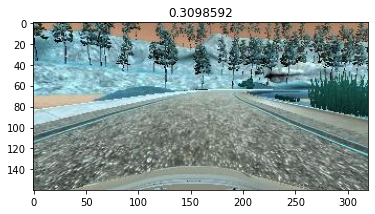

In [49]:
#checking if it seems like the right input for that frame

#show an example image
plt.imshow(x_train[43])
plt.title(y_train[43])
plt.show()



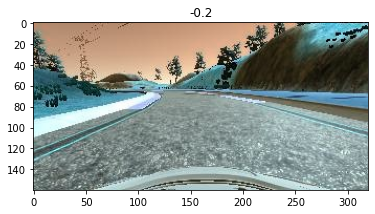

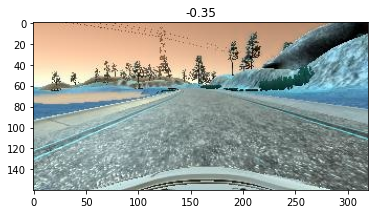

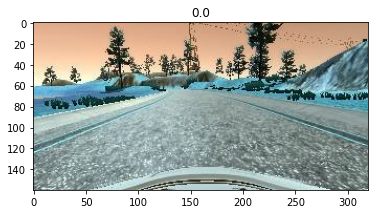

KeyError: 3

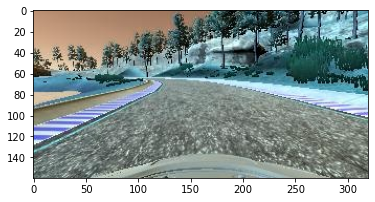

In [51]:
#show many examples
for i in range(50):
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.show()

## Creating The Model